In [29]:
## Header code + where did you put the files/where do you want the output?

%matplotlib inline
%run Prosser_header.py

dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder  = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

## Toggle button to hide code!

Toggle code

In [2]:
## Let's say we want to plot Respondent Income against Party Manifesto Redistributive-ness
## And to make it even simpler we're just averaging over all the years
## (Which is ridiculous but *simple*)

In [3]:
## We need a Respondent-Level dataset with an Income measure - right now we only have CSES
## We could load the full CSES-Respondent-Level dataset and build appropriately weighted aggregates for each party
## (linking the Respondents to a party on the basis of some Party-Respondent Link Function - who do you like best)

## But we can keep it simple and just and just load a pre-made file
## CSES_respondent_level aggregate *dataset* and CSES *variable listing*
## Party-Respondent Link Function is 'broad' (most references) and Aggregate is 'mean'

In [4]:
CSES_resp_mean = pd.read_csv(dataset_folder+\
                          "Google Drive Share Folder"+os.sep+\
                          "PARTY-COUNTRY-VOTER.0.3"+os.sep+\
                          "CSES_respondent_aggregates"+os.sep+\
                          "CSES_resp-agg_sample_broad_mean_party_csv.zip")

CSES_resp_mean = CSES_resp_mean.set_index("partyfacts_id")

CSES_VL = pd.read_csv(dataset_folder+\
                          "Google Drive Share Folder"+os.sep+\
                          "PARTY-COUNTRY-VOTER.0.3"+os.sep+\
                          "CSES_VL_csv.zip")


In [5]:
## Now we need to find the appropriate variable
## (Long-term, I'll come up with better ways than 'browsing in Excel' to locate interesting variables/structure the huge mass)

In [6]:
CSES_VL[CSES_VL["description"].apply(lambda x: "income" in x.lower())]

,new_variable_name,source_variable_name,description,response/non-response,resp_rows,non_resp_rows,variable type,variable structural type
102,IMD2006_ORD,IMD2006,GROSS PRE-TAX HOUSEHOLD INCOME QUINTILE,response,252263,63985,ordinal,respondent
103,IMD2006_DK,IMD2006,GROSS PRE-TAX HOUSEHOLD INCOME QUINTILE,non-response,252263,63985,ordinal,respondent


In [7]:
## Two variables with some mention of "income" in the description
## You want the *response* variable
## non-response variables track where/why a given entry is missing (look at resp_rows/non_resp_rows) that's ~25% of the time
## The aggregate dataset we've loaded only contains response variables

## The variable we want is IMD2006_ORD. "_ORD" reflects the fact that I have it listed it as an Ordinal variable
## So the categories were processed directly into their numerical positions (first category 0, second category 1, ... N-1 categories)
## In this case we're looking at income quintiles so the range is 0-4
## NOTE: Since we're looking at means seeing 0 or 4/anything close is a sample size red flag
##       I'm going to ignore that for this example but you can get sample sizes from the raw respondent data
##       or "CSES_resp-agg_sample_broad_count_party_csv"
## NOTE: I'll try to add some convenience column to give a hint of *which way* - from memory, 0 is *lowest* income quintile

In [8]:
mean_inc_decile = CSES_resp_mean["IMD2006_ORD"]

In [9]:
## We need party_level data on how "redistributive" Party Manifestos are
## load party_level *dataset* and *variable listing*

In [10]:
party_level = pd.read_csv(dataset_folder+\
                          "Google Drive Share Folder"+os.sep+\
                          "PARTY-COUNTRY-VOTER.0.3"+os.sep+\
                          "party_level_csv.zip")

party_level_VL = pd.read_csv(dataset_folder+\
                          "Google Drive Share Folder"+os.sep+\
                          "PARTY-COUNTRY-VOTER.0.3"+os.sep+\
                          "party_level_VL_csv.zip")

In [11]:
## Here's some variables I've used before - they kind of ish reflect redistribution if you squint a bit

In [12]:
cmp_redist_ish_vars = ["(manifesto)per"+x for x in ["404","405","409","413","504","701"]]
party_level_VL.set_index("new_variable_name").loc[cmp_redist_ish_vars]

,source_variable_name,description,group,type
new_variable_name,,,,
(manifesto)per404,per404,economic planning,man_cod,man_cod
(manifesto)per405,per405,corporatism/mixed economy,man_cod,man_cod
(manifesto)per409,per409,keynesian demand management,man_cod,man_cod
(manifesto)per413,per413,nationalisation,man_cod,man_cod
(manifesto)per504,per504,welfare +,man_cod,man_cod
(manifesto)per701,per701,labour groups +,man_cod,man_cod


In [13]:
## Annoyingly this is about as close as it gets in the Manifesto Project
## These are manifesto coding ("man_cod"!) variables and - as a rule (I believe one or two exceptions)
## the variables contain the % of quasi-sentences in the party Manifesto corpus that fit the coding category

In [14]:
## Each row of the Party_Level dataset references a Party at a specific ELECTORAL EVENT (German-SPD around the 1998GE)
## But some datasets aren't year specific (partyfacts and parlgov data for now) so they have their own "cross-year" rows with ELECTORAL EVENT blank
## As a convenience measure, I've added cross_year aggregates of datasets in those cross_year rows
## We can work with those directly in this example

In [15]:
cross_year_rows = party_level["ELECTORAL EVENT"].isnull()
party_level_cross_year_aggregates = party_level[cross_year_rows].set_index("partyfacts_id").select_dtypes('number').sort_index()

In [16]:
## Simplest (/dumbest) thing we can do is take the means of all the redistribution-ish associated coding variables

In [17]:
manifesto_redist = party_level_cross_year_aggregates[cmp_redist_ish_vars].mean(axis=1)

In [18]:
## Again, simplest way to deal with the fact that we're shotgun-marrying two datasets is to simply ignore
## any selection effects due to which parties are present in the Manifesto Project dataset and CSES data
## or which parties have only missing values for income/redistributives-ness coding variables

## So I'm just going drop any missing values and store the parties that remain in both datasets
## We can get away with that (~) since we're aggregating across all years in this toy example

In [19]:
party_overlap = set(manifesto_redist.dropna().index).intersection(mean_inc_decile.dropna().index)

In [20]:
## Mostly for aesthetics, I'm going to grab
## (i) Manifesto Project "Party Family" allocation (well, the most common one used across the dataset for each party)
## (ii) Partyfacts Party Abbreviations

In [21]:
manifesto_party_family_vars = search(party_level_cross_year_aggregates,"\(manifesto\)family").index
party_family = party_level_cross_year_aggregates[manifesto_party_family_vars].idxmax(axis=1).apply(lambda x: x.replace("(manifesto)family__","") if pd.notnull(x) else np.nan)
pf_to_abbrev  = party_level[ cross_year_rows ].set_index("partyfacts_id")["(pf)name_short"]

In [22]:
## I build a new dataframe with just the data I want to plot with 
## And then some tedious plotting code follows
## (I include a (very) basic "Party Family" -> Colour mapping - all suggestions welcome)

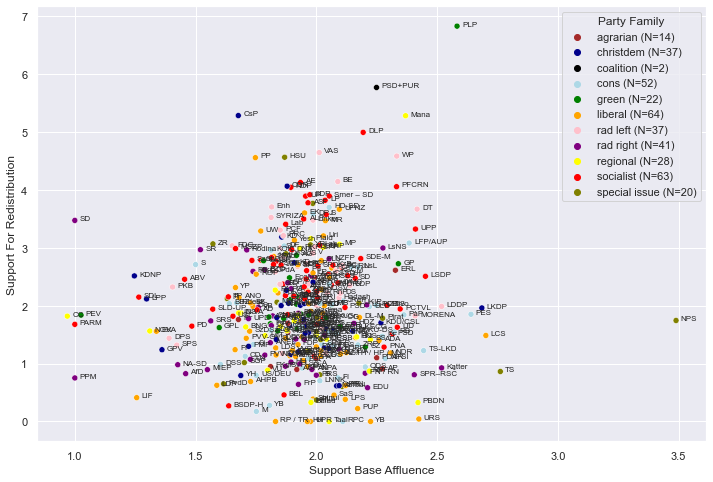

In [23]:
x_axis = "Support Base Affluence"
y_axis = "Support For Redistribution"

df =pd.DataFrame()
df[x_axis] = mean_inc_decile.loc[party_overlap]
df[y_axis] = manifesto_redist.loc[party_overlap]
df["Abbreviation"] = [pf_to_abbrev.loc[x] for x in df.index]
df["Party Family"] = party_family.astype('category').loc[party_overlap]

party_family_vc = df["Party Family"].value_counts()
df["Party Family"] = df["Party Family"].cat.rename_categories({k:k+" (N="+str(party_family_vc.loc[k])+")" for k in df["Party Family"].cat.categories})

party_colour_dict = {'green':'green', 'rad left':'pink', 'socialist':'red',
       'liberal':'orange', 'christdem':'darkblue', 'cons':'lightblue',
       'rad right':'purple', 'agrarian':'brown', 'regional':'yellow',
       'special issue':'olive','coalition':'black','unknown':'grey'}
party_colour_dict = {k+" (N="+str(party_family_vc.loc[k])+")":party_colour_dict[k] for k in party_family_vc.index}

plt.figure(figsize=(12,8))
sns.scatterplot(data = df,x=x_axis,y=y_axis,
                hue="Party Family",palette=party_colour_dict);

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=8)

label_point(df[x_axis],
            df[y_axis],
            df["Abbreviation"], plt.gca())

In [24]:
## Stocking-filler (traditional disappointing orange format)
## What if you wanted just EEA countries and the UK?

## Same process, but filter out parties using the "country" variable

In [25]:
## filter to only EEA countries and UK 

# Austria, Belgium, Bulgaria, Croatia, Republic of Cyprus, Czech Republic, Denmark, Estonia, Finland,
# France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands,
# Poland, Portugal, Romania, Slovakia, Slovenia, Spain, and Sweden.

In [26]:
EEA_and_UK_countries = ['aut', 'bel', 'bgr', 'hrv', 'cyp', 'cze', 'dnk', 'est', 'fin', 'fra', 'deu', 'grc', 'hun', 'irl', 'ita', 'lva', 'ltu', 'lux', 'mlt', 'nld', 'pol', 'prt', 'rou', 'svk', 'svn', 'esp', 'swe', 'gbr']
pf_to_country = party_level[ cross_year_rows ].set_index("partyfacts_id")["country"]
party_overlap = [ x for x in party_overlap if pf_to_country.loc[x] in EEA_and_UK_countries]

In [27]:
## tedious dataframe building/plotting code again

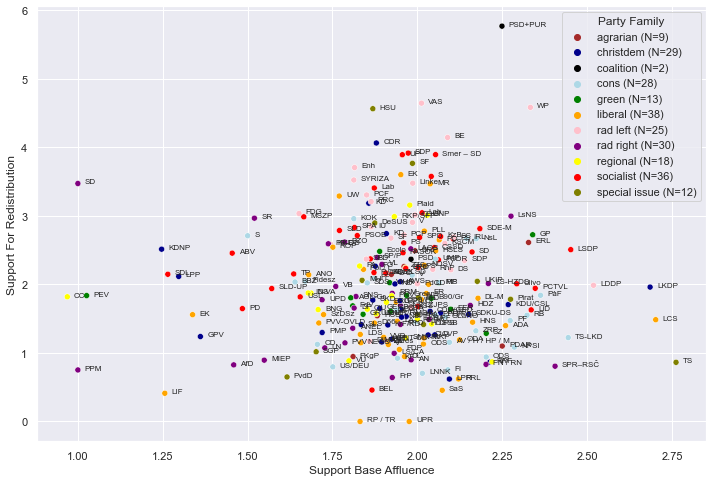

In [28]:
df =pd.DataFrame()
df[x_axis] = mean_inc_decile.loc[party_overlap]
df[y_axis] = manifesto_redist.loc[party_overlap]
df["Abbreviation"] = [pf_to_abbrev.loc[x] for x in df.index]
df["Party Family"] = party_family.loc[party_overlap].astype('category')

party_family_vc = df["Party Family"].value_counts()
df["Party Family"] = df["Party Family"].cat.rename_categories({k:k+" (N="+str(party_family_vc.loc[k])+")" for k in df["Party Family"].cat.categories})


party_colour_dict = {'green':'green', 'rad left':'pink', 'socialist':'red',
       'liberal':'orange', 'christdem':'darkblue', 'cons':'lightblue',
       'rad right':'purple', 'agrarian':'brown', 'regional':'yellow',
       'special issue':'olive','coalition':'black','unknown':'grey'}
party_colour_dict = {k+" (N="+str(party_family_vc.loc[k])+")":party_colour_dict[k] for k in party_family_vc.index}

plt.figure(figsize=(12,8))
sns.scatterplot(data = df,x=x_axis,y=y_axis,
                hue="Party Family",palette=party_colour_dict);

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=8)

label_point(df[x_axis],
            df[y_axis],
            df["Abbreviation"], plt.gca())

